# Classificação de roupas

Dados de: https://www.kaggle.com/zalando-research/fashionmnist

# Etapa 1: Importação das bibliotecas


In [1]:
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade
!pip install tensorflow --upgrade


In [2]:
# %tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import tensorflow as tf
tf.__version__


'2.7.0'

# Etapa 2: Carregamento da base de dados


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
fashion_train_df = pd.read_csv('data/fashion-mnist-train.csv', sep=',')
fashion_test_df = pd.read_csv('data/fashion-mnist-test.csv', sep=',')


# Etapa 3: Visualização dos dados


In [5]:
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape


(60000, 785)

In [8]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')


In [9]:
training


array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
training.shape


(60000, 785)

- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


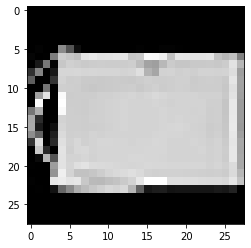

In [12]:
i = random.randint(1, 60000)
# plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(training[i, 1:].reshape((28, 28)), cmap='gray')


In [13]:
label = training[i, 0]
class_names[int(label)]


'Bag'

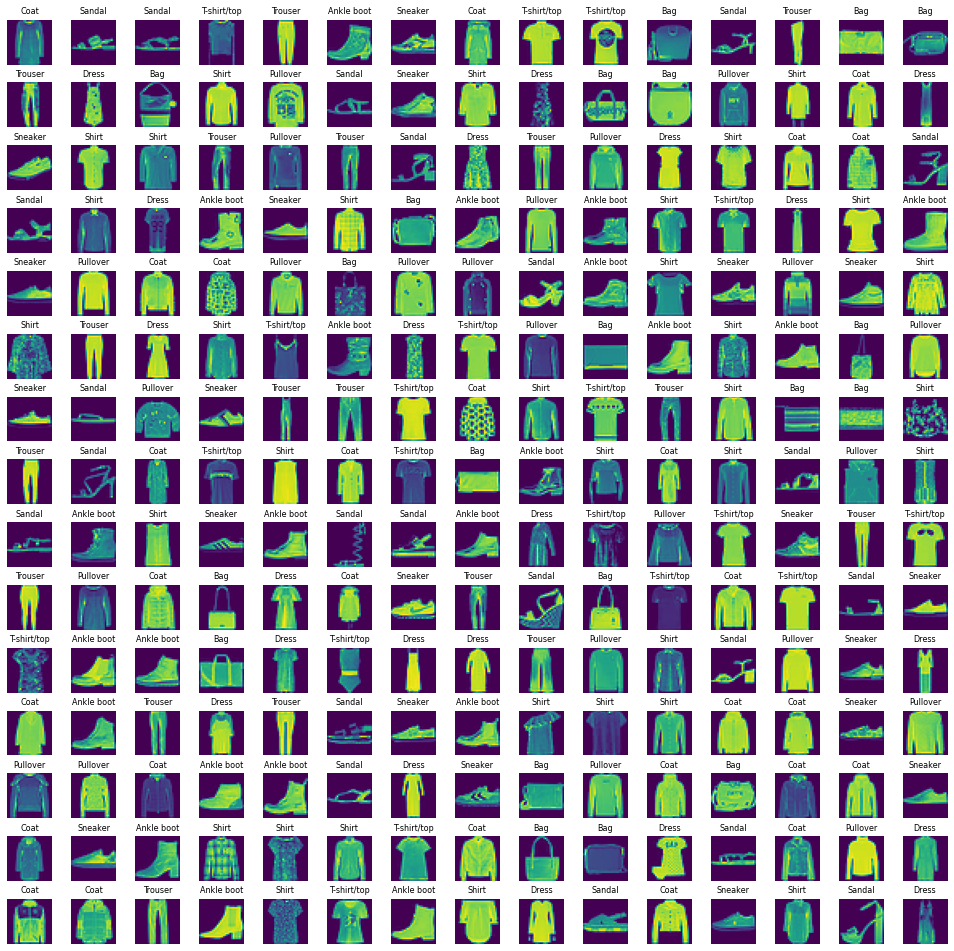

In [14]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(class_names[int(training[index, 0])], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


In [15]:
n_training


60000

# Etapa 4: Tratamento da base de dados


In [16]:
X_train = training[:, 1:] / 255
y_train = training[:, 0]


In [17]:
X_test = testing[:, 1:] / 255
y_test = testing[:, 0]


In [18]:
X_train.shape


(60000, 784)

In [19]:
y_train.shape


(60000,)

In [20]:
X_train[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))


In [22]:
X_train.shape


(60000, 28, 28, 1)

In [23]:
X_test.shape


(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo


In [24]:
from tensorflow.keras import layers, models


### Definindo o modelo


In [25]:
cnn = models.Sequential()


2021-12-12 16:10:19.227562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 16:10:19.265275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 16:10:19.265610: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-12 16:10:19.266538: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Adicionado a primeira camada de convolução e a camada de max-pooling

Hyper-parâmetros da camada de convolução:

- filters (filtros): 16
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (28, 28, 1)

Hyper-parâmetros da camada de max-pooling:

- pool_size: 2
- strides: 2
- padding: valid


In [26]:
cnn.add(layers.Conv2D(filters=16, kernel_size=3, padding="same",
        activation="relu", input_shape=[28, 28, 1]))


In [27]:
cnn.add(layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


### Adicionando a segunda camada de convolução e a camada de max-pooling

Hyper-parâmetros da camada de convolução:

- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu

Hyper-parâmetros da camada de max-pooling:

- pool_size: 2
- strides: 2
- padding: valid


In [28]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3,
        padding="same", activation="relu"))


In [29]:
cnn.add(layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


### Adicionando a terceira camada de convolução

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [30]:
cnn.add(layers.Conv2D(filters=32, kernel_size=3,
        padding="same", activation="relu"))


### Adicionando a camada de flattening


In [31]:
cnn.add(layers.Flatten())


### Adicionando a primeira camada densa (fully-connected)
Hyper-parâmetros da camada densa:

- units/neurônios: 64
- função de ativação: relu


In [32]:
cnn.add(layers.Dense(64, activation='relu'))


### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

- units/neurônios: 10 (número de classes)
- activation: softmax


In [33]:
cnn.add(layers.Dense(10, activation='softmax'))


In [34]:

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [35]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',
            metrics=['accuracy'])


In [36]:
epochs = 150


In [46]:
# %%time
history = cnn.fit(X_train, y_train, batch_size=512, epochs=epochs)


Epoch 1/150
118/118 [==============================] - 2s 11ms/step - loss: 0.8064 - accuracy: 0.7171
Epoch 2/150
118/118 [==============================] - 1s 10ms/step - loss: 0.4405 - accuracy: 0.8421
Epoch 3/150
118/118 [==============================] - 1s 10ms/step - loss: 0.3758 - accuracy: 0.8647
Epoch 4/150
118/118 [==============================] - 1s 10ms/step - loss: 0.3391 - accuracy: 0.8791
Epoch 5/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3216 - accuracy: 0.8845
Epoch 6/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2949 - accuracy: 0.8945
Epoch 7/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2821 - accuracy: 0.8994
Epoch 8/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2707 - accuracy: 0.9030
Epoch 9/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2589 - accuracy: 0.9074
Epoch 10/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2517 - 

# Etapa 6: Avaliação do modelo


In [47]:
evaluation = cnn.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.5997 - accuracy: 0.9250


In [48]:
evaluation


[0.5997494459152222, 0.925000011920929]

In [50]:
# predicted_classes = cnn.predict_classes(X_test) - This function were removed in TensorFlow version 2.6.
predicted_classes = cnn.predict(X_test)

predicted_classes = np.argmax(predicted_classes, axis=1)


In [51]:
predicted_classes


array([0, 1, 2, ..., 8, 8, 1])

In [52]:
y_test


array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

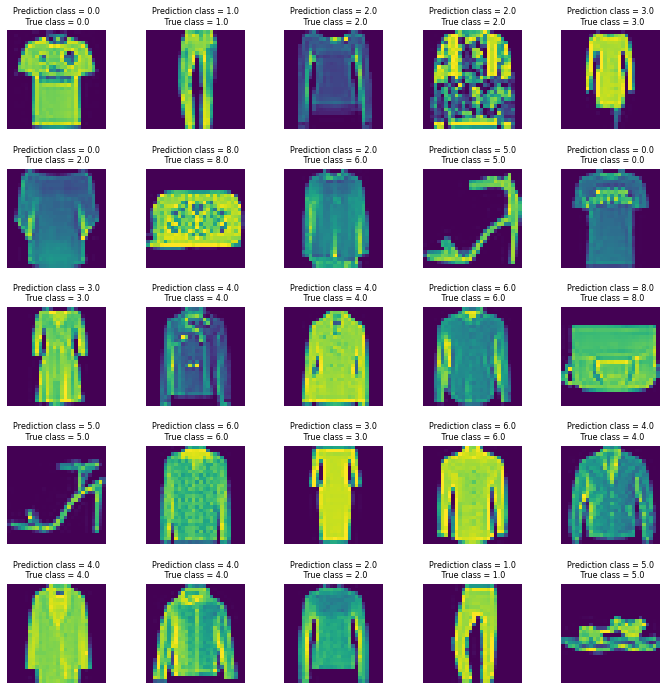

In [53]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    axes[i].imshow(X_test[i].reshape((28, 28)))
    axes[i].set_title("Prediction class = {:0.1f}\n True class = {:0.1f}".format(
        predicted_classes[i], y_test[i]), fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


<AxesSubplot:>

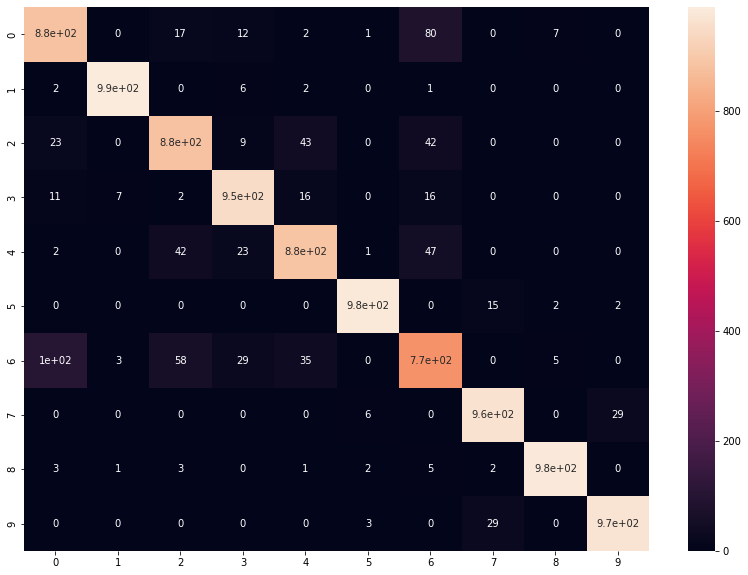

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)


In [55]:
print(classification_report(y_test, predicted_classes, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.88      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.88      0.88      1000
       Dress       0.92      0.95      0.94      1000
        Coat       0.90      0.89      0.89      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.80      0.77      0.78      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.92      0.93      0.92     10000
weighted avg       0.92      0.93      0.92     10000

